<a target="_blank" href="https://colab.research.google.com/github/pitonyak25/AUT_gamSIDIS_lib/blob/main/AUT_gamSIDIS_public.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Authors**
* Michael Harris
* Jacob Marsh
* Daniel Pitonyak (pitonyak@lvc.edu)
* Alexei Prokudin (prokudin@jlab.org)
* Jack Putnam
* Daniel Rein
* Marc Schlegel

#**Reference:** arXiv:2504.XXXXX

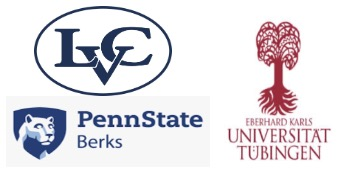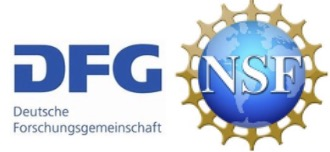

## Clone github repository with $A_{UT}^{\gamma {\rm SIDIS}}$ code, set up LHAPDF, and import functions to compute and plot $F_{FT}(x,x')$, $G_{FT}(x,x')$, and $A_{UT}^{\gamma {\rm SIDIS}}$

In [ ]:
import os,sys
import time
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import pandas as pd
from scipy.integrate import quad, fixed_quad, dblquad
import matplotlib.colors as colz
import matplotlib.cm as cms

import matplotlib
from matplotlib import rcParams
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rcParams["text.usetex"] = True
matplotlib.rc('text.latex',preamble=r"\usepackage{amsmath}")

Installing LHAPDF if it does not exist. It takes approximately 4 minutes.

In [ ]:
# lhapdf
try:
    import lhapdf
except ModuleNotFoundError: # Google Colab does not have lhapdf installed. Hence, we do it here if necessary
    start_time = time.time()

    LHAPDF_VERSION = '6.5.4'
    SITE_PACKGE_DIR = __import__('site').getsitepackages()[0]
    PWD = __import__('os').getcwd()
    PYTHON_VERSION = '%s.%s' % __import__('sys').version_info[0:2]
    !wget https://lhapdf.hepforge.org/downloads/?f=LHAPDF-{LHAPDF_VERSION}.tar.gz -O LHAPDF-{LHAPDF_VERSION}.tar.gz
    !tar xf LHAPDF-{LHAPDF_VERSION}.tar.gz
    !cd LHAPDF-{LHAPDF_VERSION} && ./configure
    !make -C LHAPDF-{LHAPDF_VERSION} -j 2
    !make -C LHAPDF-{LHAPDF_VERSION} install
    !cd {SITE_PACKGE_DIR} && ln -s {PWD}/LHAPDF-{LHAPDF_VERSION}/wrappers/python/NONE/local/lib/python{PYTHON_VERSION}/dist-packages/lhapdf
    !cd /usr/lib && ln -s {PWD}/LHAPDF-{LHAPDF_VERSION}/src/.libs/libLHAPDF.so
    !lhapdf update
    import lhapdf


    end_time = time.time()

    elapsed_time = end_time - start_time

    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60

    print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

Using CT18NLO for unpolarized PDFs and JAM3D-22 for the Sivers function

In [ ]:
!lhapdf install CT18NLO

Install latex fonts and import other packages. It takes approximately 3 minutes.

In [ ]:
try:
  import subprocess
  subprocess.check_call(["latex"])
except FileNotFoundError:
  start_time = time.time()

  print("We will install latex as it is not found")
  !apt install --quiet texlive-fonts-recommended texlive-fonts-extra cm-super dvipng


  end_time = time.time()

  elapsed_time = end_time - start_time

  minutes = int(elapsed_time // 60)
  seconds = elapsed_time % 60

  print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")
except subprocess.CalledProcessError:
  print("Latex is already installed")

In [ ]:
import os,sys
import time
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import pandas as pd
from scipy.integrate import quad, fixed_quad, dblquad
import matplotlib.colors as colz
import matplotlib.cm as cms

import matplotlib
from matplotlib import rcParams
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rcParams["text.usetex"] = True
matplotlib.rc('text.latex',preamble=r"\usepackage{amsmath}")

In [ ]:
start_time = time.time()

!git clone https://github.com/pitonyak25/AUT_gamSIDIS_lib.git

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

In [ ]:
# Update Python path
sys.path.append('./')

!cp -r /content/AUT_gamSIDIS_lib/JAM22-sivers_proton_lo_qbar /usr/local/share/LHAPDF/

# Now import repositories
from AUT_gamSIDIS_lib.AUT_gamSIDIS_public_code import get_FFT, get_GFT, AUTSIDIS, QGQ_Plot, FFT_model_params, AUTSIDIS_plot, xBxBtilde

Create folder to save plots to

In [ ]:
%mkdir gallery

## Examples computing $F_{FT}(x,x')$, $G_{FT}(x,x')$, and $A_{UT}^{\gamma {\rm SIDIS}}$ at a single kinematic point

Example computing FFT and GFT

In [ ]:
start_time = time.time()

rep=10 #replica of the Sivers function from JAM3D to use; mean value is rep=0
Q2=10 #scale the evaluate FFT and GFT at
x=0.3 #value for x
xp=0.1 #value for x'
target='p' #nucleon type: p for proton, n for neutron
##############
#These are dummy parameters whose values don't affect any output
delt = 1
eps = 1
##############
As = np.ones((6,11)) #params for FFT: A[0]=a2, A[1]=a3, A[2]=a4, A[3]=a5, A[4]=a6, A[5]=a7
Bs = np.ones((6,11)) #params for GFT: B[0]=b1, B[1]=b2, B[2]=ab3, B[3]=b4, B[4]=b5, B[5]=b6


print('FFTarr=',get_FFT(x,xp,Q2,rep,target,delt,eps,As))
print('GFTarr=',get_GFT(x,xp,Q2,rep,target,delt,eps,Bs))

#The output is an array of functions values for the parton flavors.  The correspondence is as follows
#array index: 0, 1,  2,   3,  4,   5,  6
#parton:      g, u, ubar, d, dbar, s, sbar

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

Example computing AUTgamSIDIS

In [ ]:
start_time = time.time()

s=29**2 #CM energy squared
phiS=np.pi/2 #value of phi_S
pTprime=2.0 #value of pT^\prime
pTgam=1.0 #value of pT^\gamma
eta_prime=2.0 #value of eta^\prime
eta_gam=1.0 #value of eta^\gamma
phi_prime=0 #value of phi^\prime
phi_gam=0 #value of phi^\gamma
rep=0 #replica of the Sivers function from JAM3D to use; mean value is rep=0
As = np.ones((6,11)) #params for FFT: A[0]=a2, A[1]=a3, A[2]=a4, A[3]=a5, A[4]=a6, A[5]=a7
Bs = np.ones((6,11)) #params for GFT: B[0]=b1, B[1]=b2, B[2]=ab3, B[3]=b4, B[4]=b5, B[5]=b6

#Note that delt and eps are dummy parameters whose values don't affect any output
print(AUTSIDIS(s,phiS,pTprime,pTgam,eta_prime,eta_gam,phi_prime,phi_gam,rep,As,Bs,delt=1,eps=1))

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

## Example computing $F_{FT}$ model parameters with $d_2$ lattice QCD constraint

It takes approximately 2 minutes.

In [ ]:
start_time = time.time()

Q2=4 #scale to evaluate FFT at
##############
#These are dummy parameters whose values don't affect any output
delt = 1
eps = 1
##############
target='p' #nucleon type: p for proton, n for neutron
rep=0 #replica of the Sivers function from JAM3D to use; mean value is rep=0
n=100 #number of Gaussian quadrature integration steps; 100 was found to be optimaal for accuracy

#You must choose values for a4,a6,a3,a5,a7 for up and down quarks (strange is assumed to be zero) and list them IN THAT ORDER in the arrays below
a46357_scen1u=[-2./3.,-2./3.,-1./3.,-1.,-1./3.]
a46357_scen1d=[2./3.,2./3.,1./3.,1.,1./3.]

#Lattice values for d2u and d2d.  In this case we use the RQCD Collab values from arXiv:2111.08306.
d2u = 0.026
d2d = -0.0086


#FFT_model_params will output the parameters for a given flavor ('u'=up, 'd'=down)
#The output is an array containing [a2,a3,a4,a5,a6,a7]

print(FFT_model_params('u',Q2,rep,target,delt,eps,a46357_scen1u,d2u,d2d,n))
#Each row of the output array contains the parameter value for the chosen flavor with the others set to 0
#For example, in this case, the u quark values for a2,a3,a4,a5,a6,a7 are populated with the rest of the flavors in each row set to 0

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

##Example plotting $F_{FT}(x,x')$ and $G_{FT}(x,x')$

It takes approximately 4 minutes and a half.

In [ ]:
start_time = time.time()

#Calculate the model parameters for up and down and join them together in a single matrix in the format needed by the QGQ_Plot function below
As_scen1=FFT_model_params('u',Q2,rep,target,delt,eps,a46357_scen1u,d2u,d2d,n)+FFT_model_params('d',Q2,rep,target,delt,eps,a46357_scen1d,d2u,d2d,n)

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")


Plotting take 1 minute and a half.

In [ ]:
start_time = time.time()

As = As_scen1

#Choose values for b1,b2,b3,b4,b5,b6 for up and down quarks (strange is assumed to be zero).  Each array contains the values for the given parameter for each quark flavor.
#The correspondence is as follows
#array index: 0, 1,  2,   3,  4,   5,  6
#parton:      g, u, ubar, d, dbar, s, sbar

B1= np.array([0,-As_scen1[0][1],0,-As_scen1[0][3],0,0,0,0,0,0,0]) #We have fixed b1 = -a2, but other values can be chosen
B2= np.array([0,1./3.,0,-1./3.,0,0,0,0,0,0,0])
B3= np.array([0,2./3.,0,-2./3.,0,0,0,0,0,0,0])
B4= np.array([0,1.,0,-1.,0,0,0,0,0,0,0])
B5= np.array([0,2./3.,0,-2./3.,0,0,0,0,0,0,0])
B6= np.array([0,1./3.,0,-1./3.,0,0,0,0,0,0,0])

Bs = np.array([B1,B2,B3,B4,B5,B6])

Q2=4 #scale to evaluate FFT and GFT at
##############
#These are dummy parameters whose values don't affect any output
delt = 1
eps = 1
##############
target='p' #nucleon type: p for proton, n for neutron
rep=0 #replica of the Sivers function from JAM3D to use; mean value is rep=0
grain=100 #number of x and xp values to compute between -0.8 and 0.8
cmap=cms.YlGnBu #color map for the plot
levels=20 #how many contours to plot
scen_label='1' #label for the scenario

QGQ_Plot('FFT',As,scen_label,Q2,delt,eps,rep,target,grain,cmap,levels)
QGQ_Plot('GFT',As,scen_label,Q2,delt,eps,rep,target,grain,cmap,levels)

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

##Example plotting $A_{UT}^{\gamma {\rm SIDIS}}$

It takes 4 minutes and a half

In [ ]:
start_time = time.time()

#Calculate the model parameters for up and down and join them together in a single matrix in the format needed by the QGQ_Plot function below
#NB: This calculation is NOT necessary if the As for up and down were computed previously and joined together in a single matrix
As_scen1=FFT_model_params('u',Q2,rep,target,delt,eps,a46357_scen1u,d2u,d2d,n)+FFT_model_params('d',Q2,rep,target,delt,eps,a46357_scen1d,d2u,d2d,n)

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

Plotting takes 7 minutes

In [ ]:
start_time = time.time()

As = As_scen1

#Choose values for b1,b2,b3,b4,b5,b6 for up and down quarks (strange is assumed to be zero).  Each array contains the values for the given parameter for each quark flavor.
#The correspondence is as follows
#array index: 0, 1,  2,   3,  4,   5,  6
#parton:      g, u, ubar, d, dbar, s, sbar

B1= np.array([0,-As_scen1[0][1],0,-As_scen1[0][3],0,0,0,0,0,0,0]) #We have fixed b1 = -a2, but other values can be chosen
B2= np.array([0,1./3.,0,-1./3.,0,0,0,0,0,0,0])
B3= np.array([0,2./3.,0,-2./3.,0,0,0,0,0,0,0])
B4= np.array([0,1.,0,-1.,0,0,0,0,0,0,0])
B5= np.array([0,2./3.,0,-2./3.,0,0,0,0,0,0,0])
B6= np.array([0,1./3.,0,-1./3.,0,0,0,0,0,0,0])

Bs = np.array([B1,B2,B3,B4,B5,B6])

s=29**2 #CM energy squared
phiS=np.pi/2 #value for phi_S
phi_prime=0 #value for phi^\prime
phi_gam=0 #value for phi^\gamma

pTgamin=1 #min value for pT^\gamma
pTgamax=10 #max value for pT^\gamma
pTgam_bins=20 #number of pT^\gamma bins

etaga_min=-1 #min value for eta^\gamma
etaga_max=3 #max value for eta^\gamma
etagam_bins=20 #number of eta^\gamma bins

pTprimslist=np.linspace(0.1,5,6) #range of pT^\prime values and number of bins
etaprimslist=[-2,-1,0,1] #eta^\prime values

index=0 #This is a dummy argument that doesn't affect the output

rep=0 #replica of the Sivers function from JAM3D to use; mean value is rep=0
vmin=0 #min value for |AUT| on color scale
vmax=0.10 #max value of |AUT| on color scale
scen_label='1' #label for the scenario

AUTSIDIS_plot(s,phiS,phi_prime,phi_gam,pTgam_bins,etagam_bins,rep,pTgamin,pTgamax,etaga_min,etaga_max,index,pTprimslist,etaprimslist,vmin,vmax,As,Bs,scen_label)

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

## Example plotting $x_B$-$\tilde{x}_B$ coverage

It takes 7 minutes

In [ ]:
start_time = time.time()

binsize_label='coarse' #NB: 'coarse' is the for the above bins for pT^\prime and eta^\prime.  If finer bins are chosen, the 'fine' may be an appropriate label

xBxBtilde(s,phiS,phi_prime,phi_gam,pTgam_bins,etagam_bins,rep,pTgamin,pTgamax,etaga_min,etaga_max,index,pTprimslist,etaprimslist,vmin,vmax,As,Bs,scen_label,binsize_label)

end_time = time.time()

elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")